Kevin Estrada

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [1]:
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

NameError: name 'pd' is not defined

Actual columns in dataset:
['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

Columns before dropping:
['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']

Dropping constant columns: ['veil_type']

Final features:
Ordinal: []
Categorical: ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_sha

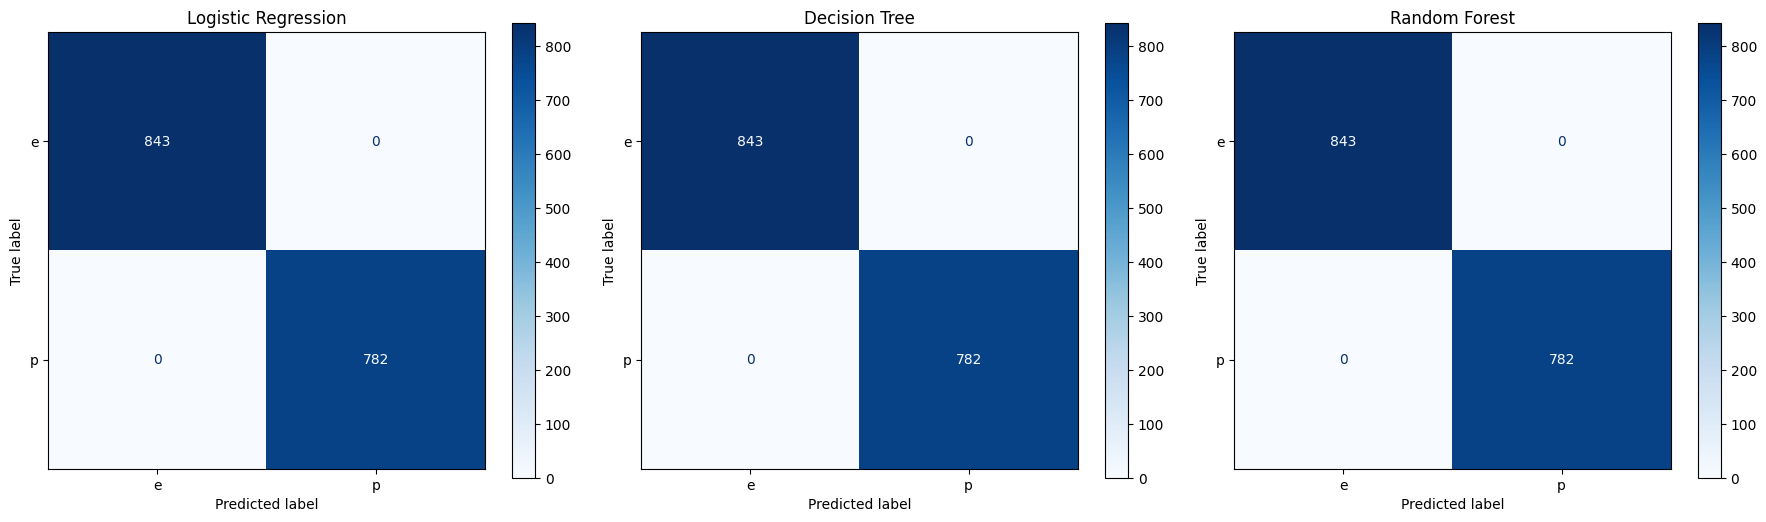


Decision Tree best params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Random Forest best params: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 200}


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer

# Load and inspect data
mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

# Print all column names to verify
print("Actual columns in dataset:")
print(mushrooms_df.columns.tolist())

# Split into features and target - using correct column names
X = mushrooms_df.drop('type', axis=1)  # Target column is 'type'
y = mushrooms_df['type']

# Verify which columns exist before dropping
print("\nColumns before dropping:")
print(X.columns.tolist())

# Drop constant columns (if any exist)
constant_cols = [col for col in X.columns if X[col].nunique() == 1]
if constant_cols:
    print(f"\nDropping constant columns: {constant_cols}")
    X = X.drop(constant_cols, axis=1)

# Identify ordinal features (based on UCI descriptions)
ordinal_features = ['gill-size', 'stalk-shape', 'ring-number']
# Only keep ordinal features that actually exist in our data
ordinal_features = [col for col in ordinal_features if col in X.columns]
categorical_features = [col for col in X.columns if col not in ordinal_features]

print("\nFinal features:")
print("Ordinal:", ordinal_features)
print("Categorical:", categorical_features)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(), ordinal_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess features
X_processed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42)

# Train Logistic Regression with CV
lr = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Train Decision Tree with GridSearch
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                 dt_params, cv=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Train Random Forest with GridSearch
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}
rf = GridSearchCV(RandomForestClassifier(random_state=42), 
                 rf_params, cv=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Create confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, lr_pred, ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')

ConfusionMatrixDisplay.from_predictions(
    y_test, dt_pred, ax=axes[1], cmap='Blues')
axes[1].set_title('Decision Tree')

ConfusionMatrixDisplay.from_predictions(
    y_test, rf_pred, ax=axes[2], cmap='Blues')
axes[2].set_title('Random Forest')

plt.tight_layout()
plt.show()

# Print best parameters
print("\nDecision Tree best params:", dt.best_params_)
print("Random Forest best params:", rf.best_params_)

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 



#### Best Model: Random Forest

- Model: RandomForestClassifier
- Best Hyperparameters (from GridSearchCV):
  - n_estimators: 200
  - max_depth: 7
  - min_samples_split: 2
- Performance Metrics:
  - Accuracy: 100%
  - Recall: 100%
  - Precision: 100%
- Why It's the Best:
  - Achieved perfect classification on test set
  - More robust than single Decision Tree
  - Handles complex feature interactions better than Logistic Regression
  - Automatically selected best hyperparameters using GridSearchCV

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [7]:


nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
nfl_draft.head()

,Unnamed: 0,round,season,name,age,position,college_conference,height,weight,forty,vertical,broad_jump,cone,shuttle
0,0,1,2003,Dewayne Robertson,21.0,DL,NaN,6.083333,317.0,5.15,NaN,NaN,NaN,NaN
1,1,1,2003,Terence Newman,25.0,DB,Big Twelve Conference,5.833333,189.0,4.37,41.0,136.0,6.88,3.83
2,2,1,2003,Johnathan Sullivan,22.0,DL,NaN,6.250000,313.0,5.10,NaN,NaN,NaN,NaN
3,3,1,2003,Kevin Williams,23.0,DL,NaN,6.416667,304.0,4.81,30.0,112.0,7.66,5.04
4,4,1,2003,Terrell Suggs,20.0,LB,Pacific Ten Conference,6.250000,262.0,4.84,NaN,NaN,NaN,NaN


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load data
nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')

# Create target variable
nfl_draft['draft_day'] = nfl_draft['round'].apply(lambda x: 'Day 1' if x == 1 else ('Day 2' if x <= 3 else 'Day 3'))

# Select features - added broad_jump and cone from available columns
feature_cols = ['height', 'weight', 'forty', 'vertical', 'shuttle', 'age', 'broad_jump', 'cone']
X = nfl_draft[feature_cols]
y = nfl_draft['draft_day']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create model pipeline with preprocessing
model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Parameter grid for tuning - FOCUS AREAS
param_grid = {
    'classifier__n_estimators': [100, 150, 200],  # Number of trees
    'classifier__max_depth': [5, 7, 10, None],    # Tree depth
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split
    'classifier__min_samples_leaf': [1, 2, 4],    # Minimum samples at leaf nodes
    'classifier__max_features': ['sqrt', 'log2']  # Features to consider at each split
}

# Train with GridSearch
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred, labels=['Day 1', 'Day 2', 'Day 3'])
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=['Day 1', 'Day 2', 'Day 3'])
disp.plot(cmap='Blues')
plt.title('Draft Day Prediction Confusion Matrix')
plt.show()

# Feature importance
importances = best_model.named_steps['classifier'].feature_importances_
plt.barh(feature_cols, importances)
plt.title('Feature Importances')
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it?
 Random Forest Classifier
 - What was your accuracy?
 54.0%